# Quantium - Task 2
## Data Processing and Visualization

Soul Foods has provided you with three CSV files, all of which are in the data folder of the starter repo you cloned in the last task. These CSV files contain transaction data for Soul Foods’s entire morsel line. Each row indicates the quantity of a given type of morsel sold in a given region at a given price on a given day. Take a moment to acquaint yourself with the data contained in each one of these files.

In [3]:
import pandas as pd
import numpy as np

In [4]:
import os
for dirname, _, filenames in os.walk('/quantium-softwareengineer/data/'): # open files
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
data2018 = pd.read_csv('data/daily_sales_data_0.csv')
data2019 = pd.read_csv('data/daily_sales_data_1.csv')
data2020 = pd.read_csv('data/daily_sales_data_2.csv')

In [6]:
data2018.head()

,product,price,quantity,date,region
0,pink morsel,$3.00,546,2018-02-06,north
1,pink morsel,$3.00,549,2018-02-06,south
2,pink morsel,$3.00,577,2018-02-06,east
3,pink morsel,$3.00,519,2018-02-06,west
4,gold morsel,$9.99,580,2018-02-06,north


In [7]:
data = pd.concat([data2018, data2019, data2020], ignore_index=True)
data

,product,price,quantity,date,region
0,pink morsel,$3.00,546,2018-02-06,north
1,pink morsel,$3.00,549,2018-02-06,south
2,pink morsel,$3.00,577,2018-02-06,east
3,pink morsel,$3.00,519,2018-02-06,west
4,gold morsel,$9.99,580,2018-02-06,north
...,...,...,...,...,...
41155,vermilion morsel,$4.99,475,2022-02-14,west
41156,lapis morsel,$1.99,425,2022-02-14,north
41157,lapis morsel,$1.99,454,2022-02-14,south
41158,lapis morsel,$1.99,483,2022-02-14,east


In [8]:
data.isnull().sum()

product     0
price       0
quantity    0
date        0
region      0
dtype: int64

In [9]:
# Filter only rows containing "pink morsels"
pink_morsels = data[data['product'] == 'pink morsel']
pink_morsels

,product,price,quantity,date,region
0,pink morsel,$3.00,546,2018-02-06,north
1,pink morsel,$3.00,549,2018-02-06,south
2,pink morsel,$3.00,577,2018-02-06,east
3,pink morsel,$3.00,519,2018-02-06,west
28,pink morsel,$3.00,529,2018-02-07,north
...,...,...,...,...,...
41107,pink morsel,$5.00,478,2022-02-13,west
41132,pink morsel,$5.00,407,2022-02-14,north
41133,pink morsel,$5.00,493,2022-02-14,south
41134,pink morsel,$5.00,500,2022-02-14,east


In [10]:
pink_morsels['price'].value_counts()

price
$3.00    4296
$5.00    1584
Name: count, dtype: int64

In [11]:
# Remove dollar signs and convert column to float
pink_morsels['price'] = pink_morsels['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\dinar\AppData\Local\Temp\ipykernel_1552\3126563079.py:2: SyntaxWarning: invalid escape sequence '\$'
  pink_morsels['price'] = pink_morsels['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\dinar\AppData\Local\Temp\ipykernel_1552\3126563079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_morsels['price'] = pink_morsels['price'].replace('[\$,]', '', regex=True).astype(float)


In [12]:
# count sales
pink_morsels['sales'] = pink_morsels['price'] * pink_morsels['quantity']

# print output
pink_morsels

C:\Users\dinar\AppData\Local\Temp\ipykernel_1552\2001062187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_morsels['sales'] = pink_morsels['price'] * pink_morsels['quantity']


,product,price,quantity,date,region,sales
0,pink morsel,3.0,546,2018-02-06,north,1638.0
1,pink morsel,3.0,549,2018-02-06,south,1647.0
2,pink morsel,3.0,577,2018-02-06,east,1731.0
3,pink morsel,3.0,519,2018-02-06,west,1557.0
28,pink morsel,3.0,529,2018-02-07,north,1587.0
...,...,...,...,...,...,...
41107,pink morsel,5.0,478,2022-02-13,west,2390.0
41132,pink morsel,5.0,407,2022-02-14,north,2035.0
41133,pink morsel,5.0,493,2022-02-14,south,2465.0
41134,pink morsel,5.0,500,2022-02-14,east,2500.0


In [13]:
# Select the required columns
result = pink_morsels[['sales', 'date', 'region']]
result.head()

,sales,date,region
0,1638.0,2018-02-06,north
1,1647.0,2018-02-06,south
2,1731.0,2018-02-06,east
3,1557.0,2018-02-06,west
28,1587.0,2018-02-07,north


In [14]:
# Save the results into a new CSV file.
result.to_csv('pink_morsels_sales.csv', index=False)

### Visualization

In [32]:
result = result.sort_values(by='date')

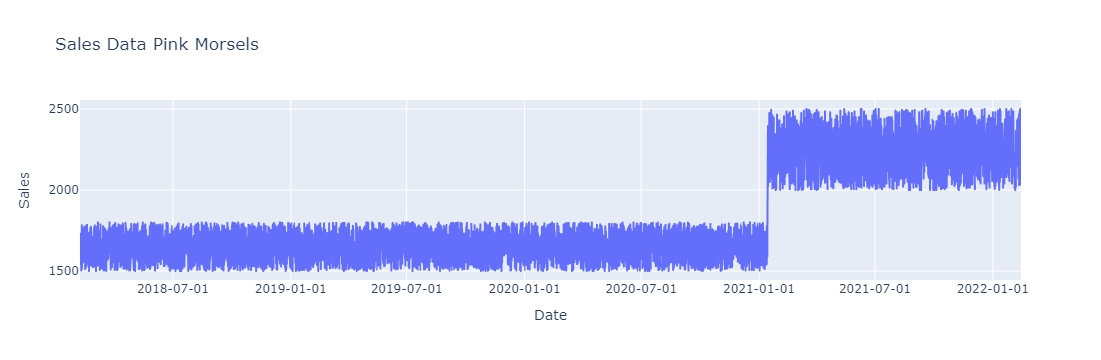

In [34]:
import plotly.express as px

fig = px.line(result, x='date', y='sales', title='Sales Data Pink Morsels')
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sales',
    xaxis=dict(
        tickformat='%Y-%m-%d',
        title_text='Date'
    ),
    yaxis=dict(
        title_text='Sales'
    )
)